# Image Classification with PyTorch
### *Cats vs Dogs Dataset*

---

# Predicting cats versus dogs (binary classification)

## Dataset

The dataset we will be using is the Cats vs Dogs.

The data was originally shared by Microsoft in 2017.

Each observation is a color image representing either a dog or a cat..

The original dataset is avalaible here: [cats vs dogs](https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip)


## Objective

Our goal is to build a Convolution Neural Network model called VGG16 that can predict accurately if an image is representing a dog or a cat.

## Instructions

This is a guided exercise where some of the code have already been pre-defined. Your task is to fill the remaining part of the code (it will be highlighted with placehoders) to train and evaluate your model.

This exercise is split in several parts:
1.   Loading and Exploration of the Dataset
2.   Preparing the Dataset
3.   Defining the CNN Architecture (we will build a VGG16 from scratch):
    - 2 Convolutional layers of 64 kernels of (3,3) and same padding
    - 1 Max pooling layer of size (2,2) and stride (2,2)
    - 2 Convolutional layers of 128 kernels of (3,3) and same padding
    - 1 Max pooling layer of size (2,2) and stride (2,2)
    - 3 Convolutional layers of 256 kernels of (3,3) and same padding
    - 1 Max pooling layer of size (2,2) and stride (2,2)
    - 3 Convolutional layers of 512 kernels of (3,3) and same padding
    - 1 Max pooling layer of size (2,2) and stride (2,2)
    - 3 Convolutional layers of 512 kernels of (3,3) and same padding
    - 1 Max pooling layer of size (2,2) and stride (2,2)
    - Fully-connected layer of 4096 units
    - Fully-connected layer of 4096 units
    - Fully-connected layer of 1 units
    - ReLU as the activation function for the hidden layers
    - Adam as the optimiser
4.   Training and Evaluation of the Model

## Exercise 3 Solution

**[1.1]** First we need to import the relevant class and libraries from PyTorch including 'os' in python. One method of utilizing operating system-dependent functionality in Python is through the OS module.The OS module provides functions that allow you to interact with underlying operating system that Python is running on – be that Windows, Mac or Linux.

In [1]:
# Solution
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import os

**[1.2]**
First we need to download locally the zip file from the link provided earlier. Then we will save the following path '/content/cats_and_dogs_filtered' in a variable called 'dataset_dir'. We will using os.path.exists() [https://docs.python.org/3/library/os.path.html] method in python to check the directory path exists or not. If the path exists then download the dataset.

##### Task: Download the dataset locally

In [3]:
# Solution
file_url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
dataset_dir = '~/Development/UTS/deep_learning/mod3/cats_and_dogs_filtered'
if not os.path.exists(dataset_dir):
    !wget $file_url
    !unzip cats_and_dogs_filtered.zip

--2025-03-04 20:13:27--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.167.91, 142.250.67.27, 142.250.76.123, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.167.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  10.2MB/s    in 7.3s    

2025-03-04 20:13:35 (8.92 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]

Archive:  cats_and_dogs_filtered.zip
   creating: cats_and_dogs_filtered/
  inflating: cats_and_dogs_filtered/vectorize.py  
   creating: cats_and_dogs_filtered/validation/
   creating: cats_and_dogs_filtered/train/
   creating: cats_and_dogs_filtered/validation/dogs/
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.21

### 2.   Preparing the Dataset

**[2.1]** Apply transformation using compose class. This time we will not only normalize the images but we will also perform some data transformation such as RandomResizedCrop(100) [https://pytorch.org/vision/main/generated/torchvision.transforms.RandomResizedCrop.html] and RandomHorizontalFlip [https://pytorch.org/vision/main/generated/torchvision.transforms.RandomHorizontalFlip.html] for train data and Resize (100) for test data. Data augmentation is a good practice for the train set. Here, we randomly crop the image to 100x100 and randomly flip it horizontally. After then we will normalizes the tenosr images of train and test set using the normalize function of torchvision [https://pytorch.org/vision/main/generated/torchvision.transforms.Normalize.html].

In [4]:
# Solution
# Define data transformations
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(100),                            # Randomly crop the image to 100x100
    transforms.RandomHorizontalFlip(),                            # Randomly flip the image horizontally
    transforms.RandomRotation(40),                                # Randomly rotate the image by up to 40 degrees
    transforms.ToTensor(),                                        # Convert image to a PyTorch tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))        # Normalize with mean of 0.5 and std deviation of 0.5 for each channel
])

test_transform = transforms.Compose([
    transforms.Resize((100, 100)),                                # Resize the image to 100x100
    transforms.ToTensor(),                                        # Convert image to a PyTorch tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))        # Normalize with mean of 0.5 and std deviation of 0.5 for each channel
])

**[2.2]**
The images are already split into a 'train' and 'validation' folders under 'cats_and_dogs_filtered'

##### Task: Create 2 variables called train_dataset and test_dataset and loading images from train and validation folders into the PyTorch datasets using `ImageFolder`class of torchvision [https://pytorch.org/vision/main/generated/torchvision.datasets.ImageFolder.html] .

In [5]:
# Solution
train_dataset = torchvision.datasets.ImageFolder(root=os.path.join(dataset_dir, 'train'), transform=train_transform)
test_dataset = torchvision.datasets.ImageFolder(root=os.path.join(dataset_dir, 'validation'), transform=test_transform)

**[2.3]**
Let's print the image of 'cat' and 'dog' from the train_dataset

##### Task: print the image

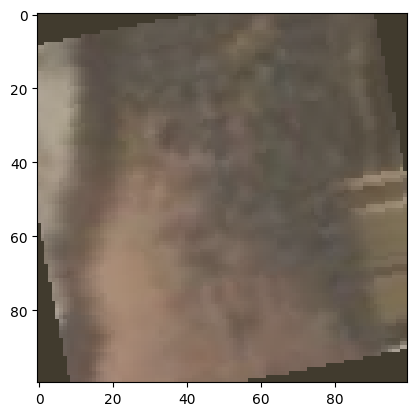

Cat Label: 0


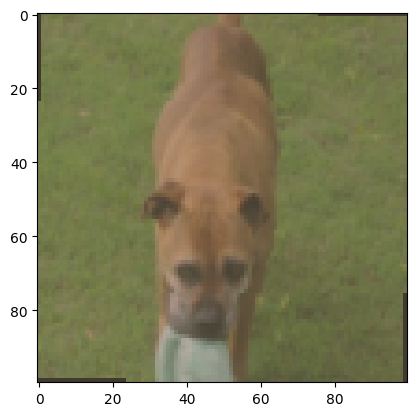

Dog Label: 1


In [6]:
# Solution
import matplotlib.pyplot as plt
import numpy as np

# Function to show an image
def imshow(img):
    mean = np.array([0.485, 0.456, 0.406])  # Mean values for normalization
    std = np.array([0.229, 0.224, 0.225])   # Standard deviation values for normalization
    img = img.numpy().transpose((1, 2, 0))  # Transposing the image from (C, H, W) to (H, W, C) for visualization
    img = std * img + mean                  # Applying normalization
    img = np.clip(img, 0, 1)                # Clip to ensure values are in [0, 1] range
    plt.imshow(img)                         # Display the image
    plt.show()                              # Show the plot

# Get a random cat and dog image
cat_idx = train_dataset.class_to_idx['cats']  # Get the index of the 'cat' class
dog_idx = train_dataset.class_to_idx['dogs']  # Get the index of the 'dog' class

cat_img_idx = np.random.choice(np.where(np.array(train_dataset.targets) == cat_idx)[0])  # Choose a random index of a cat image
dog_img_idx = np.random.choice(np.where(np.array(train_dataset.targets) == dog_idx)[0])  # Choose a random index of a dog image

cat_img, cat_label = train_dataset[cat_img_idx]  # Get the cat image and its label
dog_img, dog_label = train_dataset[dog_img_idx]  # Get the dog image and its label

# Show the images
imshow(cat_img)                 # Display the cat image
print('Cat Label:', cat_label)  # Print the label of the cat image

imshow(dog_img)                 # Display the dog image
print('Dog Label:', dog_label)  # Print the label of the dog image

**[2.4]**
Combine the train_dataet and test_dataset using ConcatDataset class of torch.utils.data [https://pytorch.org/docs/stable/data.html].

In [7]:
# Solution
full_dataset = torch.utils.data.ConcatDataset([train_dataset, test_dataset])

**[2.5]**
Lets split the size of the full_dataset into train, test and validation data set according to following ratio 70%:15%:15% and save it into train_size, val_size and test_size.

In [8]:
# Solution
total_data = len(full_dataset)
train_size = int(0.7 * total_data)
val_size = int(0.15 * total_data)
test_size = int (0.15 * total_data)

**[2.6]**
According to the size of the dataset, now we will split a dataset into several subsets such as train_dataset,val_dataset, and test_dataset by using the random_split function (https://pytorch.org/docs/stable/data.html)

In [9]:
# Solution
train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, val_size, test_size])

**[2.7]**  Now we will call the DataLoader function that iteratively loads data based on batch size, shuffle and save it into three different variables called `train_loader`, `val_loader` and `test_loader`. Set the `BATCH_SIZE` to 20. The shuffle is a boolean variable. By default the shuffle value is false. If the shuffle is `True` means that the data is randomly shuffled before each epoch, so the order of the data is different in each epoch. (https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)

In [10]:
# Solution
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=20, shuffle=True) # Shuffle only for training
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=20, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=20, shuffle=False)

**[2.8]**  Let's save the length/size of train_dataset, val_dataset and test_dataset using the len() function and save it into `total_train`, `total_val` and `total_test`.

In [11]:
# Solution
total_train = len(train_dataset)
total_val = len(val_dataset)
total_test = len(test_dataset)

# Print the total number of training and testing samples
print(f"Size of training set: {total_train}")
print(f"Size of validation set: {total_val}")
print(f"Size of test set: {total_test}")

Size of training set: 2100
Size of validation set: 450
Size of test set: 450


### 3.   Defining the Architecture of CNN

**[3.1]** Import `torch.nn` as `nn`.

In [12]:
# Solution
import torch.nn as nn

**[3.2]** Then we will set the seeds as 168 for PyTorch in order to get reproducible results

In [13]:
# Solution
torch.manual_seed(168)

**[3.3]** Now we will define the model architecture. In this architecture,we will create a class named VGG16 consists of 13 convolutional layers using the [Conv2D](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html) class from PyTorch. After then we will instantiate 3 fully-connected layers for making the
predictions.

##### Task:
1. Create 13 convolutional layers with the right number of kernels, size of kernel and activation function, Max Pooling layer with [MaxPool2D](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html) that will be used after each Conv2D
2. Create 3 fully-connected layers and specify the right number of units and activation function

Note: the first Conv2D will be the input layer so you will need to specify the input channels.

**Task: You need to create 3 fully-connected layers with the relevant number of units and activation function.**

In [15]:
# Solution
class VGG16(nn.Module):
    def __init__(self):
        super(VGG16, self).__init__()
        self.features = nn.Sequential(

            # First block: two conv layers (input channels=3, output channels=64) + ReLU activations
            nn.Conv2d(3, 64, kernel_size=3, padding=1),       # 1st convolutional layer
            nn.ReLU(inplace=True),                            # ReLU activation function to introduce non-linearity
            nn.Conv2d(64, 64, kernel_size=3, padding=1),      # 2nd convolutional layer
            nn.ReLU(inplace=True),                            # ReLU activation function
            nn.MaxPool2d(kernel_size=2, stride=2),            # Max pooling layer with 2x2 kernel and stride 2

            # Second block: two conv layers (64->128) + ReLU + MaxPool
            nn.Conv2d(64, 128, kernel_size=3, padding=1),     # 3rd convolutional layer
            nn.ReLU(inplace=True),                            # ReLU activation function
            nn.Conv2d(128, 128, kernel_size=3, padding=1),    # 4th convolutional layer
            nn.ReLU(inplace=True),                            # ReLU activation function
            nn.MaxPool2d(kernel_size=2, stride=2),            # Max pooling layer with 2x2 kernel and stride 2

            # Third block: three conv layers (128->256) + ReLU + MaxPool
            nn.Conv2d(128, 256, kernel_size=3, padding=1),    # 5th convolutional layer
            nn.ReLU(inplace=True),                            # ReLU activation function
            nn.Conv2d(256, 256, kernel_size=3, padding=1),    # 6th convolutional layer
            nn.ReLU(inplace=True),                            # ReLU activation function
            nn.Conv2d(256, 256, kernel_size=3, padding=1),    # 7th convolutional layer
            nn.ReLU(inplace=True),                            # ReLU activation function
            nn.MaxPool2d(kernel_size=2, stride=2),            # Max pooling layer with 2x2 kernel and stride 2

            # Fourth block: three conv layers (256->512) + ReLU + MaxPool
            nn.Conv2d(256, 512, kernel_size=3, padding=1),    # 8th convolutional layer
            nn.ReLU(inplace=True),                            # ReLU activation function
            nn.Conv2d(512, 512, kernel_size=3, padding=1),    # 9th convolutional layer
            nn.ReLU(inplace=True),                            # ReLU activation function
            nn.Conv2d(512, 512, kernel_size=3, padding=1),    # 10th convolutional layer
            nn.ReLU(inplace=True),                            # ReLU activation function
            nn.MaxPool2d(kernel_size=2, stride=2),            # Max pooling layer with 2x2 kernel and stride 2

            # Fifth block: three conv layers (512->512) + ReLU + MaxPool
            nn.Conv2d(512, 512, kernel_size=3, padding=1),    # 11th convolutional layer
            nn.ReLU(inplace=True),                            # ReLU activation function
            nn.Conv2d(512, 512, kernel_size=3, padding=1),    # 12th convolutional layer
            nn.ReLU(inplace=True),                            # ReLU activation function
            nn.Conv2d(512, 512, kernel_size=3, padding=1),    # 13th convolutional layer
            nn.ReLU(inplace=True),                            # ReLU activation function
            nn.MaxPool2d(kernel_size=2, stride=2),            # Max pooling layer with 2x2 kernel and stride 2
        )

        # Define the fully connected classifier layers
        self.classifier = nn.Sequential(
            nn.Linear(512 * 3 * 3, 4096),                     # 1st fully connected layer with 512 * 3 * 3 input features and 4096 output features
            nn.ReLU(inplace=True),                            # ReLU activation function
            nn.Linear(4096, 4096),                            # 2nd fully connected layer with 4096 input features and 4096 output features
            nn.ReLU(inplace=True),                            # ReLU activation function
            nn.Linear(4096, 1),                               # Output layer with 4096 input features and 1 output feature
            nn.Sigmoid()                                      # Sigmoid activation function to produce a binary output
        )

    def forward(self, x):           # Define the forward pass method
        x = self.features(x)        # Pass input through the convolutional feature extractor layers
        x = x.view(x.size(0), -1)   # Flatten the output from convolutional layers
        x = self.classifier(x)      # Pass the flattened output through the fully connected classifier layers
        return x                    # Return the output


**[3.4]** Now instantiate the class and save it into a variable named `model'. Now our architecture is ready. Lets print the model summary.

In [16]:
# Solution
model = VGG16()
print(model)

VGG16(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation

### 4. Training and Evaluation of the Model

**[4.1]** Instantiate a `nn.BCELoss()` and save it into a variable called `criterion`.

In [17]:
# Solution
criterion = nn.BCELoss()      #Binary Cross Entropy Loss for binary classification

**[4.2]**  Instantiate a `torch.optim.Adam()` optimizer with the model's parameters and 0.0001 as learning rate and save it into a variable called `optimizer`

In [18]:
# Solution
optimizer = optim.Adam(model.parameters(), lr=0.0001)

**[4.3]**  Move model to GPU

In [22]:
# Solution
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")   # Check if GPU is available, and move the model to GPU if true
model.to(device)                                                        # Move the model to the selected device (GPU or CPU)

VGG16(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation

**[4.4]** **Training:** Now it is time to train our model. Set the `EPOCHS` to 5 and create a for loop that will iterate based on the EPOCHS value. A nested loop is initiated that extracts data and target from train_loader and introduce the following logics:
- reset the gradients
- perform the forward propagation and get the model predictions
- calculate the loss between the predictions and the actuals
- perform back propagation
- update the weights
- Count the total loss

To validate the model a nested loop is initiated that extracts images and labels from `val_loader` and introduce the following logics:
- disable computing gradients (https://pytorch.org/docs/stable/generated/torch.no_grad.html)
- perform the forward propagation and get the model predictions
- calculate the loss between the predictions and the actuals
- Count the total loss
- Count the correct outcome

In [23]:
# Solution
train_losses = []               # List to store training losses for each epoch
train_accuracies = []           # List to store training accuracies for each epoch
val_losses = []                 # List to store validation losses for each epoch
val_accuracies = []             # List to store validation accuracies for each epoch

# Training the model
num_epochs = 5  # Number of epochs for training

for epoch in range(num_epochs):   # Loop over each epoch
    model.train()                 # Set the model to training mode
    running_loss = 0.0            # Variable to accumulate training loss for each epoch
    correct_train = 0             # Variable to accumulate number of correct predictions for training data
    total_train = 0               # Variable to accumulate total number of samples in training data

    # Training loop
    for inputs, labels in train_loader:                           # Iterate over train_loader
        inputs, labels = inputs.to(device), labels.to(device)     # Move inputs and labels to the device (e.g., GPU)
        optimizer.zero_grad()                                     # Reset the gradients
        outputs = model(inputs)                                   # Forward Propagation to get predicted outcome
        loss = criterion(outputs.squeeze(), labels.float())       # Compute the loss
        loss.backward()                                           # Back-propagation
        optimizer.step()                                          # Update the weights
        running_loss += loss.item()                               # Accumulate training loss

        # Calculate training accuracy
        predicted = torch.round(outputs).squeeze()            # Round the predicted probabilities to get binary predictions
        total_train += labels.size(0)                         # Increment the total number of samples processed in the training dataset
        correct_train += (predicted == labels).sum().item()   # Count correct predictions

    train_losses.append(running_loss / len(train_loader))  # Append the training loss to the list
    train_accuracies.append(correct_train / total_train)    # Append the training accuracy to the list

    # Validation part
    model.eval()              # Set the model to evaluation mode
    running_val_loss = 0.0    # Variable to accumulate validation loss for each epoch
    correct_val = 0           # Variable to accumulate number of correct predictions for validation data
    total_val = 0             # Variable to accumulate total number of samples in validation data

    with torch.no_grad():                                             # Turn off gradient calculation for validation
        for inputs, labels in val_loader:                             # Iterate over validation data batches
            inputs, labels = inputs.to(device), labels.to(device)     # Move inputs and labels to the device (e.g., GPU)
            outputs = model(inputs)                                   # Forward pass
            val_loss = criterion(outputs.squeeze(), labels.float())   # Calculate the validation loss
            running_val_loss += val_loss.item()

            # Calculate validation accuracy
            predicted = torch.round(outputs).squeeze()            # Round the predicted probabilities to get binary predictions (0 or 1)
            total_val += labels.size(0)                           # Increment the total number of samples processed in the validation dataset
            correct_val += (predicted == labels).sum().item()     # Compare between the predicted and actual

    val_losses.append(running_val_loss / len(val_loader))   # Append the validation loss to the list
    val_accuracies.append(correct_val / total_val)          # Append the validation accuracy to the list

    # Printing the Results
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracies[-1]:.2%}, Validation Loss: {val_losses[-1]:.4f}, Validation Accuracy: {val_accuracies[-1]:.2%}")

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, mps:0 and cpu!

**[4.5]** **Testing:** Now it is time to test our model. Initiate the `model.eval()` along with `torch.no_grad()` to turn off the gradients. Finally calculate the total and correct value. If the predicted output equals the actual output then count the correct value.

In [ ]:
# Solution
model.eval()        # Set the model to evaluation mode
correct_test = 0    # Initialize the number of correctly predicted samples on the test dataset
total_test = 0      # Initialize the total number of samples in the test dataset

# Iterate over the test dataset
with torch.no_grad():
    for inputs, labels in test_loader:                                        # Iterate over test data batches
        inputs, labels = inputs.to(device), labels.to(device)                 # Move inputs and labels to the device (e.g., GPU)
        outputs = model(inputs)                                               # Forward pass through the model to get predictions
        predicted = torch.round(outputs)                                      # Round the predicted probabilities to get binary predictions (0 or 1)
        total_test += labels.size(0)                                          # Increment the total number of samples processed in the test dataset
        correct_test += (predicted.squeeze() == labels.float()).sum().item()  # Increment the number of correctly predicted samples

# Calculate test accuracy
test_accuracy = correct_test / total_test             # Calculate the accuracy by dividing the number of correct predictions by the total number of samples
print(f"Test Accuracy: {100 * test_accuracy:.2f}%")   # Print the test accuracy as a percentage

The performance of this model is average in recognising cats and dogs after 5 epochs. In this exercise we extended the usage of torchvision.transforms module [https://pytorch.org/vision/0.13/transforms.html] to perform data augmentation transformation.